In [80]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [20]:
# View Masurement table columns
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11e2a78ed30>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [21]:
# View Station table columns
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11e2a7a2400>,
 'elevation': 3.0,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'id': 1,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

# Exploratory Climate Analysis

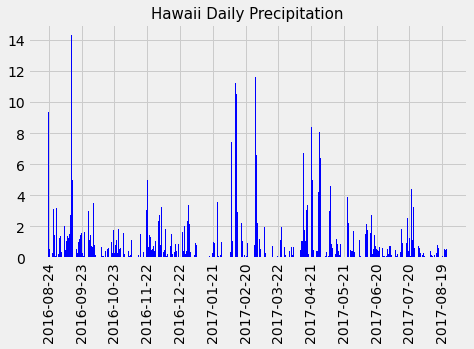

In [127]:
## Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#session.query(Measurement.date).filter(Measurement.date >= '2016-08-23').order_by(Measurement.date).count()

# Perform a query to retrieve the data and precipitation scores
from sqlalchemy.sql import func
sel = [func.sum(Measurement.prcp), Measurement.date]

rainfall = session.query(*sel).\
    order_by(Measurement.date).\
    filter(Measurement.date >= '2016-08-24').\
    group_by(Measurement.date).all()
rainfall

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(rainfall, columns=["Precipitation", "Date"]).set_index("Date")
df.head(50)

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(7,4))
plt.xticks(rotation=90)
plt.title("Hawaii Daily Precipitation", fontsize=15)
ax.bar(df.index, df["Precipitation"], color="b")
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))


In [99]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,365.000000
mean,0.974164
std,1.776466
min,0.000000
25%,0.050000
50%,0.400000
75%,1.080000
max,14.280000


In [137]:
# Design a query to show how many stations are available in this dataset?

# Simple queries on Station database returns 9 unique stations
session.query(Station.station).all()
session.query(Station.station).count()

# Confirm results by using groupby function in Measurement databse; also returns 9 stations
session.query(Measurement.station).group_by(Measurement.station).all()
session.query(Measurement.station).group_by(Measurement.station).count()


9

In [155]:
# What are the most active stations? (i.e. what stations have the most rows)?
active_stations = session.query(Measurement.station, func.sum(Measurement.tobs)).\
    group_by(Measurement.station).all()

active_stations

# List the stations and the counts in descending order.
pd.DataFrame(active_stations, columns=["Stations", "Total Obs"]).sort_values(by="Total Obs", ascending=False)


,Stations,Total Obs
7,USC00519397,203083.0
8,USC00519523,198957.0
6,USC00519281,198652.0
1,USC00513117,196915.0
3,USC00516128,185230.0
2,USC00514830,164871.0
0,USC00511918,141728.0
4,USC00517948,102467.0
5,USC00518838,37162.0


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
